<a href="https://colab.research.google.com/github/jyg333/tensorflow_training/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install -U finance-datareader
#Because There is no package of FinanceDateReader in colab

Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.7/dist-packages (0.9.31)


In [ ]:
"""Facebook 에서 만든 시계열 예측 라이브러리 ,linear Model"""
from fbprophet import Prophet
import pandas as pd
import numpy as np
import seaborn as sns
import io
import warnings
import matplotlib.pyplot as plt

import FinanceDataReader as fdr # 주가 데이터를 불러오는 패키지

%matplotlib inline
warnings.filterwarnings('ignore')

samsung = fdr.DataReader('005930') #종목 코드, 오름차순 데이터
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-14,80800,80900,80500,80500,10550078,-0.006173
2021-06-15,80900,81200,80600,80900,10075685,0.004969
2021-06-16,81500,81900,81100,81800,14999855,0.011125
2021-06-17,81100,81300,80700,80900,14007385,-0.011002
2021-06-18,81100,81100,80500,80500,14618173,-0.004944


# 새 섹션

In [ ]:
apple = fdr.DataReader('AAPL')
apple.tail()

In [ ]:
btc = fdr.DataReader('BTC/KRW', '2016-01-01')
btc
plt.figure(figsize=(16,9))
sns.lineplot(x=btc.index,y='Close',data=btc)
plt.show()

In [ ]:
#범위를 지정해서 가져오기
btc_1 = fdr.DataReader('BTC/KRW','2019-01-01','2021-06-17')
print(btc_1)
plt.figure(figsize=(16,9))
sns.lineplot(x=btc_1.index,y='Close',data=btc_1)
plt.show()

In [ ]:
#Stock Data 가져오기
sam_stock_code = '005930'
stock_0 = fdr.DataReader(sam_stock_code)
stock_0.head()
stock_0.index

DatetimeIndex(['1997-06-16', '1997-06-17', '1997-06-18', '1997-06-19',
               '1997-06-20', '1997-06-21', '1997-06-23', '1997-06-24',
               '1997-06-25', '1997-06-26',
               ...
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [ ]:
time_steps = [['1990','2000'],
              ['2000','2010'],
              ['2010','2015'],
              ['2015','2020']
              ]
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
  ax = axes[i//2, i %2]
  df = stock_0.loc[(stock_0.index > time_steps[i][0]) & (stock_0.index < time_steps[i][1])] # & 연산자로 구간 나누기
  sns.lineplot(y= df['Close'], x =df.index, ax=ax)
  ax.set_title(f'{time_steps[i][0]} ~ {time_steps[i][1]}')
  ax.set_xlabel('time')
  ax.set_ylabel('price')
plt.tight_layout()

plt.show()

In [30]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly 

In [ ]:
#반드시 y, ds column이 존재하여야 한다.
#예측값은 y, 시계열 데이터는 ds 에 저장한다.
sam_stock_code = '005930'
stock = fdr.DataReader(sam_stock_code,'2019')
stock.head()
stock['y'] = stock['Close']
stock['ds'] = stock.index
stock.head()

#Prophet 개체 선언 및 학습
prop = Prophet()
prop.fit(stock)

In [ ]:
#예측할 시계역 row 추가
future = prop.make_future_dataframe(periods=30) # 예측하고 싶은 기간
future.tail()

,ds
634,2021-07-14
635,2021-07-15
636,2021-07-16
637,2021-07-17
638,2021-07-18


In [ ]:
#predict를 이용한 예측 , future 데이타프레임을 입력
prediction = prop.predict(future)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
634,2021-07-14,87145.148542,79816.238180,84335.037555,86929.410257,87372.866820,-4884.833368,-4884.833368,-4884.833368,-1404.725764,-1404.725764,-1404.725764,-3480.107604,-3480.107604,-3480.107604,0.0,0.0,0.0,82260.315175
635,2021-07-15,87212.507731,80154.913305,84656.952337,86977.301946,87465.426341,-4933.882990,-4933.882990,-4933.882990,-1472.820975,-1472.820975,-1472.820975,-3461.062015,-3461.062015,-3461.062015,0.0,0.0,0.0,82278.624741
636,2021-07-16,87279.866920,80179.771812,84475.446675,87030.362278,87544.867568,-4910.184417,-4910.184417,-4910.184417,-1469.878355,-1469.878355,-1469.878355,-3440.306062,-3440.306062,-3440.306062,0.0,0.0,0.0,82369.682503
637,2021-07-17,87347.226108,85343.963077,89725.627135,87081.477497,87631.593908,231.796719,231.796719,231.796719,3650.909376,3650.909376,3650.909376,-3419.112657,-3419.112657,-3419.112657,0.0,0.0,0.0,87579.022827
638,2021-07-18,87414.585297,85605.449034,89975.857841,87124.670227,87716.540615,252.121218,252.121218,252.121218,3650.909449,3650.909449,3650.909449,-3398.788231,-3398.788231,-3398.788231,0.0,0.0,0.0,87666.706515


In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
599,2021-06-07,81538.137968,79277.745226,83526.710829
600,2021-06-08,81822.044320,79615.472681,84174.649994
601,2021-06-09,81867.387776,79766.095330,83981.823706
602,2021-06-10,81863.254929,79786.865057,83962.886969
603,2021-06-11,81920.170040,79700.087417,84022.319795
604,2021-06-14,81912.746973,79729.172042,84097.441356
605,2021-06-15,82127.587698,79994.313161,84435.562656
606,2021-06-16,82103.499415,79938.060522,84318.221629
607,2021-06-17,82030.770880,79893.898361,83971.629083
608,2021-06-18,82021.105482,79947.885534,84255.316758


In [ ]:
#Visualization
fig = prop.plot(prediction)

In [ ]:
#plot_plotly 활용
fig2 = plot_plotly(prop, prediction)
fig2

In [ ]:
#component 별 시각화
plot_components_plotly(prop, prediction)

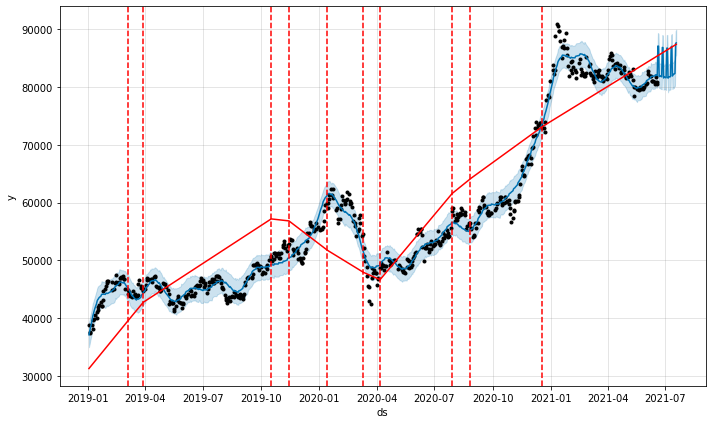

In [34]:
# Prophet은 균등하게 위치한 처음 80% 시계열 데이터인 25개의 체크포인트를 구체화 하고, 수직석으로 체크포인트 위츠를를 명시함
from fbprophet.plot import add_changepoints_to_plot
fig = prop.plot(prediction)
point = add_changepoints_to_plot(fig.gca(),prop, prediction)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


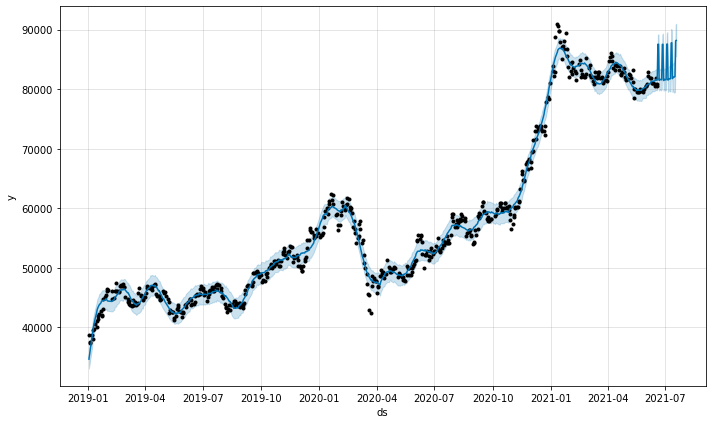

In [33]:
#Adjust Flexibility
#Flexibility 계수가 낮으면 과소적합, 높으면 과대적합하여 예측한다.
# 0.05의 기본값을 갖고, 증가시키면 유연성이 높아진다.
#Prophet 객체는 1번만 Fit 할 수 있음. 만약 여러번 Fit 하고 싶으면 새로운 객체를 생성해야 함

flex = Prophet(changepoint_prior_scale=0.8)
prediction_1 = flex.fit(stock).predict(future)
fig_2 = prop.plot(prediction_1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


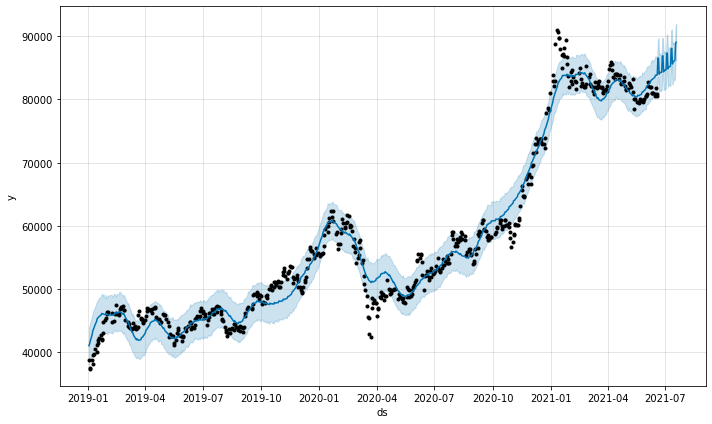

In [35]:
#과소적합
flex = Prophet(changepoint_prior_scale=0.01)
prediction_1 = flex.fit(stock).predict(future)
fig_2 = prop.plot(prediction_1)